In [1]:
import numpy as np
mu, sigma = 0, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [3]:
#generate traing data 
def fx(x,e):
    num=0
    y=[]
    
    while num<len(x):
        z=int(x[num])
        yy=z**3+e[num]
        num+=1
        y.append(yy)
        
    return y

In [132]:
import random
x=[]
for i in range(-6,7):
    
    x.append(i)
    x.append(i+0.5)
y=fx(x,s)
y

[-218.0746335299468,
 -123.628716178845,
 -124.47178322504604,
 -64.90885776481376,
 -64.66633595152067,
 -24.665002903910036,
 -28.34024762956647,
 -7.175048886900528,
 -8.767502654392601,
 -1.5810324190283531,
 -3.6584171326891486,
 -1.8644543911913796,
 2.8214156081954274,
 1.5983355646716089,
 2.48547097760996,
 2.5832209045630505,
 9.677240352521729,
 5.8713470168633775,
 24.11689281615907,
 24.029608912643326,
 65.61111852672464,
 60.77579918761985,
 120.6010953085372,
 132.28384177872073,
 216.22562969755313,
 211.1607026269648]

In [133]:
y=np.array(y)
x=np.array(x)

In [141]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


# Define inputs with predefined shape
inputs = Input(shape=(1,))

# Build network with some predefined architecture
output1 = Dense(10,activation='relu')(inputs)
output2 = Dense(10,activation='relu')(output1)

# Predict the target variable with a single Dense output
regression_output = Dense(2)(output2)

# Construct model
model = Model(inputs=inputs, outputs=regression_output)

In [142]:
import keras.backend as K
import numpy as np
import tensorflow as tf

def log10(x):
  numerator = K.log(x)
  denominator = K.log(K.constant(10, dtype=numerator.dtype))
  return numerator / denominator

def gaussian_nll(ytrue, ypreds):
    """Keras implmementation of multivariate Gaussian negative loglikelihood loss function. 
    This implementation implies diagonal covariance matrix.
    
    Parameters
    ----------
    ytrue: tf.tensor of shape [n_samples, n_dims]
        ground truth values
    ypreds: tf.tensor of shape [n_samples, n_dims*2]
        predicted mu and logsigma values (e.g. by your neural network)
        
    Returns
    -------
    neg_log_likelihood: float
        negative loglikelihood averaged over samples
        
    This loss can then be used as a target loss for any keras model, e.g.:
        model.compile(loss=gaussian_nll, optimizer='Adam') 
    
    """
    
    n_dims = int(int(ypreds.shape[1])/2)
    mu = ypreds[:, 0:n_dims]
    logsigma = ypreds[:, n_dims:]
    
    mse = 0.5*K.sum(K.square(ytrue-mu)/(logsigma),axis=1)
    sigma_trace = 0.5*K.sum(log10(logsigma), axis=1)
    log2pi = 0.5*n_dims*np.log(2*np.pi)
    
    log_likelihood = mse+sigma_trace+log2pi

    return K.mean(log_likelihood)

In [143]:
model.compile(optimizer='adam', loss=gaussian_nll)
model_fit = model.fit(x, y, 
                      batch_size=1, epochs=1000,verbose=2
                   )

Epoch 1/1000
26/26 - 0s - loss: nan
Epoch 2/1000
26/26 - 0s - loss: nan
Epoch 3/1000
26/26 - 0s - loss: nan
Epoch 4/1000
26/26 - 0s - loss: 49868.9023
Epoch 5/1000
26/26 - 0s - loss: 37521.4648
Epoch 6/1000
26/26 - 0s - loss: 36199.6484
Epoch 7/1000
26/26 - 0s - loss: 34649.5859
Epoch 8/1000
26/26 - 0s - loss: 33427.1602
Epoch 9/1000
26/26 - 0s - loss: 32260.1348
Epoch 10/1000
26/26 - 0s - loss: 22835.8145
Epoch 11/1000
26/26 - 0s - loss: 15471.0176
Epoch 12/1000
26/26 - 0s - loss: 11866.4473
Epoch 13/1000
26/26 - 0s - loss: 9490.5449
Epoch 14/1000
26/26 - 0s - loss: 8156.5498
Epoch 15/1000
26/26 - 0s - loss: 7043.7612
Epoch 16/1000
26/26 - 0s - loss: 6380.2920
Epoch 17/1000
26/26 - 0s - loss: 5768.3564
Epoch 18/1000
26/26 - 0s - loss: 5326.2402
Epoch 19/1000
26/26 - 0s - loss: 4984.7993
Epoch 20/1000
26/26 - 0s - loss: 4649.7139
Epoch 21/1000
26/26 - 0s - loss: 4356.3540
Epoch 22/1000
26/26 - 0s - loss: 4155.6431
Epoch 23/1000
26/26 - 0s - loss: 3920.1013
Epoch 24/1000
26/26 - 0s - lo

26/26 - 0s - loss: 202.3497
Epoch 193/1000
26/26 - 0s - loss: 200.3656
Epoch 194/1000
26/26 - 0s - loss: 198.4166
Epoch 195/1000
26/26 - 0s - loss: 196.5653
Epoch 196/1000
26/26 - 0s - loss: 194.3521
Epoch 197/1000
26/26 - 0s - loss: 192.6011
Epoch 198/1000
26/26 - 0s - loss: 190.7020
Epoch 199/1000
26/26 - 0s - loss: 188.7910
Epoch 200/1000
26/26 - 0s - loss: 186.9164
Epoch 201/1000
26/26 - 0s - loss: 185.2295
Epoch 202/1000
26/26 - 0s - loss: 183.3175
Epoch 203/1000
26/26 - 0s - loss: 181.5143
Epoch 204/1000
26/26 - 0s - loss: 179.8060
Epoch 205/1000
26/26 - 0s - loss: 178.1722
Epoch 206/1000
26/26 - 0s - loss: 176.2589
Epoch 207/1000
26/26 - 0s - loss: 174.6730
Epoch 208/1000
26/26 - 0s - loss: 173.0063
Epoch 209/1000
26/26 - 0s - loss: 171.3854
Epoch 210/1000
26/26 - 0s - loss: 169.6885
Epoch 211/1000
26/26 - 0s - loss: 168.1947
Epoch 212/1000
26/26 - 0s - loss: 166.5408
Epoch 213/1000
26/26 - 0s - loss: 164.9391
Epoch 214/1000
26/26 - 0s - loss: 163.2486
Epoch 215/1000
26/26 - 0s 

Epoch 386/1000
26/26 - 0s - loss: 36.5180
Epoch 387/1000
26/26 - 0s - loss: 36.2344
Epoch 388/1000
26/26 - 0s - loss: 35.9500
Epoch 389/1000
26/26 - 0s - loss: 35.7042
Epoch 390/1000
26/26 - 0s - loss: 35.3828
Epoch 391/1000
26/26 - 0s - loss: 35.1563
Epoch 392/1000
26/26 - 0s - loss: 34.8309
Epoch 393/1000
26/26 - 0s - loss: 34.5641
Epoch 394/1000
26/26 - 0s - loss: 34.3071
Epoch 395/1000
26/26 - 0s - loss: 34.0416
Epoch 396/1000
26/26 - 0s - loss: 33.7936
Epoch 397/1000
26/26 - 0s - loss: 33.4941
Epoch 398/1000
26/26 - 0s - loss: 33.2313
Epoch 399/1000
26/26 - 0s - loss: 33.0074
Epoch 400/1000
26/26 - 0s - loss: 32.7376
Epoch 401/1000
26/26 - 0s - loss: 32.5298
Epoch 402/1000
26/26 - 0s - loss: 32.2330
Epoch 403/1000
26/26 - 0s - loss: 32.0072
Epoch 404/1000
26/26 - 0s - loss: 31.7454
Epoch 405/1000
26/26 - 0s - loss: 31.5047
Epoch 406/1000
26/26 - 0s - loss: 31.2489
Epoch 407/1000
26/26 - 0s - loss: 31.0384
Epoch 408/1000
26/26 - 0s - loss: 30.8201
Epoch 409/1000
26/26 - 0s - loss: 

26/26 - 0s - loss: 11.4299
Epoch 582/1000
26/26 - 0s - loss: 11.3830
Epoch 583/1000
26/26 - 0s - loss: 11.3374
Epoch 584/1000
26/26 - 0s - loss: 11.2976
Epoch 585/1000
26/26 - 0s - loss: 11.2624
Epoch 586/1000
26/26 - 0s - loss: 11.2176
Epoch 587/1000
26/26 - 0s - loss: 11.1920
Epoch 588/1000
26/26 - 0s - loss: 11.1478
Epoch 589/1000
26/26 - 0s - loss: 11.1055
Epoch 590/1000
26/26 - 0s - loss: 11.0609
Epoch 591/1000
26/26 - 0s - loss: 11.0020
Epoch 592/1000
26/26 - 0s - loss: 10.9635
Epoch 593/1000
26/26 - 0s - loss: 10.9372
Epoch 594/1000
26/26 - 0s - loss: 10.8879
Epoch 595/1000
26/26 - 0s - loss: 10.8618
Epoch 596/1000
26/26 - 0s - loss: 10.8179
Epoch 597/1000
26/26 - 0s - loss: 10.7830
Epoch 598/1000
26/26 - 0s - loss: 10.7408
Epoch 599/1000
26/26 - 0s - loss: 10.6930
Epoch 600/1000
26/26 - 0s - loss: 10.6584
Epoch 601/1000
26/26 - 0s - loss: 10.6284
Epoch 602/1000
26/26 - 0s - loss: 10.5820
Epoch 603/1000
26/26 - 0s - loss: 10.5764
Epoch 604/1000
26/26 - 0s - loss: 10.4982
Epoch 6

26/26 - 0s - loss: 5.1678
Epoch 781/1000
26/26 - 0s - loss: 5.1272
Epoch 782/1000
26/26 - 0s - loss: 5.1208
Epoch 783/1000
26/26 - 0s - loss: 5.0687
Epoch 784/1000
26/26 - 0s - loss: 5.0271
Epoch 785/1000
26/26 - 0s - loss: 4.9865
Epoch 786/1000
26/26 - 0s - loss: 4.9621
Epoch 787/1000
26/26 - 0s - loss: 4.9159
Epoch 788/1000
26/26 - 0s - loss: 4.8902
Epoch 789/1000
26/26 - 0s - loss: 4.8553
Epoch 790/1000
26/26 - 0s - loss: 4.8169
Epoch 791/1000
26/26 - 0s - loss: 4.7955
Epoch 792/1000
26/26 - 0s - loss: 4.7604
Epoch 793/1000
26/26 - 0s - loss: 4.7279
Epoch 794/1000
26/26 - 0s - loss: 4.7035
Epoch 795/1000
26/26 - 0s - loss: 4.6860
Epoch 796/1000
26/26 - 0s - loss: 4.6577
Epoch 797/1000
26/26 - 0s - loss: 4.6219
Epoch 798/1000
26/26 - 0s - loss: 4.5896
Epoch 799/1000
26/26 - 0s - loss: 4.5717
Epoch 800/1000
26/26 - 0s - loss: 4.5431
Epoch 801/1000
26/26 - 0s - loss: 4.5362
Epoch 802/1000
26/26 - 0s - loss: 4.5004
Epoch 803/1000
26/26 - 0s - loss: 4.4747
Epoch 804/1000
26/26 - 0s - los

26/26 - 0s - loss: 2.9458
Epoch 981/1000
26/26 - 0s - loss: 2.9402
Epoch 982/1000
26/26 - 0s - loss: 2.9391
Epoch 983/1000
26/26 - 0s - loss: 2.9348
Epoch 984/1000
26/26 - 0s - loss: 2.9322
Epoch 985/1000
26/26 - 0s - loss: 2.9301
Epoch 986/1000
26/26 - 0s - loss: 2.9242
Epoch 987/1000
26/26 - 0s - loss: 2.9211
Epoch 988/1000
26/26 - 0s - loss: 2.9220
Epoch 989/1000
26/26 - 0s - loss: 2.9186
Epoch 990/1000
26/26 - 0s - loss: 2.9124
Epoch 991/1000
26/26 - 0s - loss: 2.9091
Epoch 992/1000
26/26 - 0s - loss: 2.9107
Epoch 993/1000
26/26 - 0s - loss: 2.9036
Epoch 994/1000
26/26 - 0s - loss: 2.9061
Epoch 995/1000
26/26 - 0s - loss: 2.9010
Epoch 996/1000
26/26 - 0s - loss: 2.9020
Epoch 997/1000
26/26 - 0s - loss: 2.8917
Epoch 998/1000
26/26 - 0s - loss: 2.8957
Epoch 999/1000
26/26 - 0s - loss: 2.8897
Epoch 1000/1000
26/26 - 0s - loss: 2.8879


In [144]:
y_pre=model.predict(x)
sigma=np.sqrt(y_pre[:,1:])
sigma
y_pre[:,:1]

array([[-133.14833  ],
       [-118.25586  ],
       [-103.36341  ],
       [ -88.47097  ],
       [ -73.57853  ],
       [ -58.68608  ],
       [ -43.793648 ],
       [ -28.901192 ],
       [ -14.214376 ],
       [  -9.159378 ],
       [  -4.1043615],
       [   0.592906 ],
       [  -4.3530283],
       [  -9.586852 ],
       [  -5.5301847],
       [   4.7618217],
       [  19.946075 ],
       [  35.270626 ],
       [  50.96019  ],
       [  66.741875 ],
       [  82.52527  ],
       [  98.308685 ],
       [ 114.092094 ],
       [ 129.8755   ],
       [ 145.65889  ],
       [ 161.44232  ]], dtype=float32)

<Figure size 800x600 with 0 Axes>

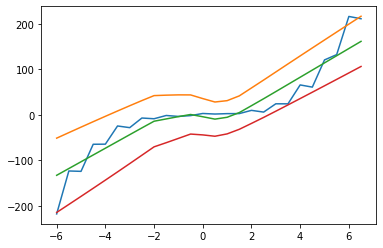

<Figure size 800x600 with 0 Axes>

In [149]:
import matplotlib.pyplot as plt
plt.plot(x,y,label="True")
plt.plot(x,y_pre[:,:1]+2*sigma,label="Pre1")
plt.plot(x,y_pre[:,:1],label="pre")
plt.plot(x,y_pre[:,:1]-2*sigma,label="Pre1")
plt.figure(figsize=(8, 6), dpi=100)